# Geo-structural modeling

This notebook contains all the steps to create the 3D Geo-structural model of the New Jersey shelf. It is based on the open-source modeling package GemPy. Two types of input data were used for constraining the model. Surface points and orientations. Surface points are based on picking seismic horizons in Petrel, orientations were manually added. Seven prominent sequences are modelled. 

In [15]:
# Import dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.precision', 2)

In [16]:
# Create model object
geo_model = gp.create_model('Geo-structural model NJ shelf')

In [17]:
# Initialize data, extent and resolution
geo_model = gp.init_data(geo_model, [0, 69000, 0, 134000, -1700, 0], [138,268,85], 
                        path_i="Data/Geo-structural model/SurfacePoints.csv",
                        path_o="Data/Geo-structural model/Orientations.csv")

Active grids: ['regular']


In [18]:
# Order surfaces (Stratigraphic pile (top to bottom))
gp.map_stack_to_surfaces(geo_model,{"SF_series": ('SeaFloor'),
                                    "m1_series": ('m1'),
                                    "m4_1_series": ('m4_1'),
                                    "m5_series": ('m5'),
                                    "m5_4_series": ('m5_4'),
                                    "m5_8_series": ('m5_8'),
                                    "m6_series": ('m6'),
                                    "o1_series": ('o1'),
                                    "base_series": ('basement')})

,surface,series,order_surfaces,color,id
0,SeaFloor,SF_series,1,#015482,1
1,m1,m1_series,1,#9f0052,2
2,m4_1,m4_1_series,1,#ffbe00,3
3,m5,m5_series,1,#728f02,4
4,m5_4,m5_4_series,1,#443988,5
5,m5_8,m5_8_series,1,#ff3f20,6
6,m6,m6_series,1,#5DA629,7
7,o1,o1_series,1,#4878d0,8
8,basement,base_series,1,#ee854a,9


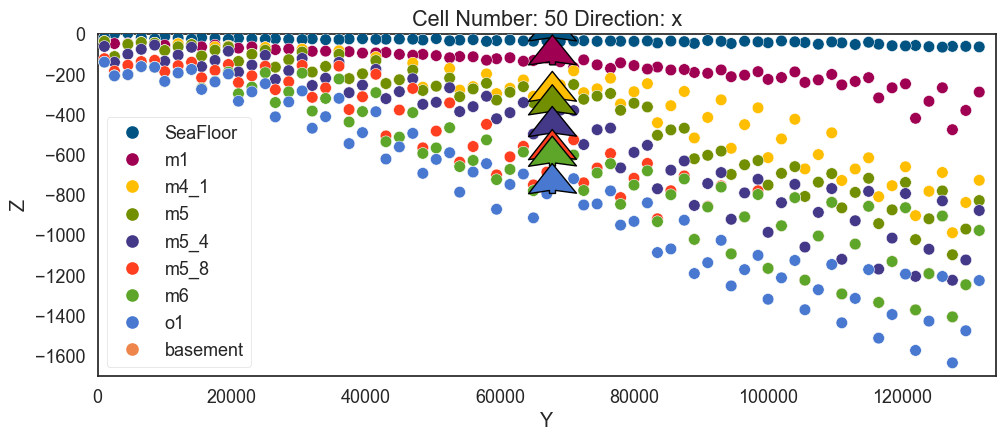

In [19]:
# Input data cross section along dip direction
gp.plot_2d(geo_model, cell_number=[50],
           direction=['x'], show_data=True, ve=30)

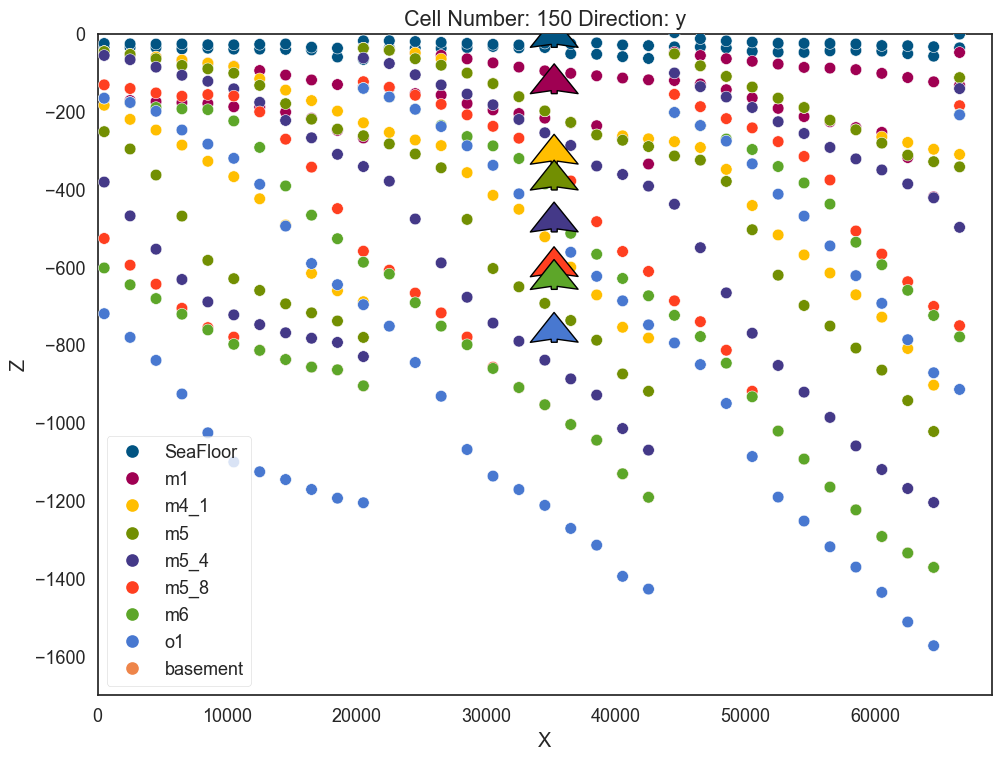

In [20]:
# Input data cross section along strike direction
gp.plot_2d(geo_model, cell_number=[150],
           direction=['y'], show_data=True, ve=30)

In [21]:
%%time
# Set interpolator
interp_data = gp.set_interpolator(geo_model, theano_optimizer='fast_run',compile_theano=True)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                       values
range                              150731.18
$C_o$                            540949761.9
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3]
CPU times: total: 17.9 s
Wall time: 18.4 s


In [22]:
%%time
# Compute model solution
sol=gp.compute_model(geo_model,compute_mesh=True)

CPU times: total: 35min 2s
Wall time: 4min 58s


In [31]:
sol.lith_block

array([9.        , 9.        , 9.        , ..., 1.00289056, 1.00000136,
       1.        ])

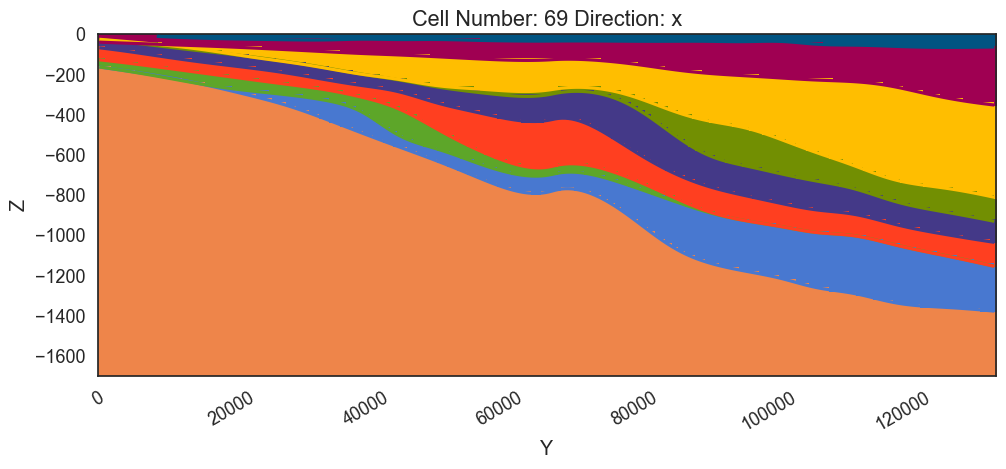

In [23]:
# Model cross section along dip direction
gp.plot_2d(geo_model, direction="x", cell_number=69, ve=30, show_data=False, show_lith=True)

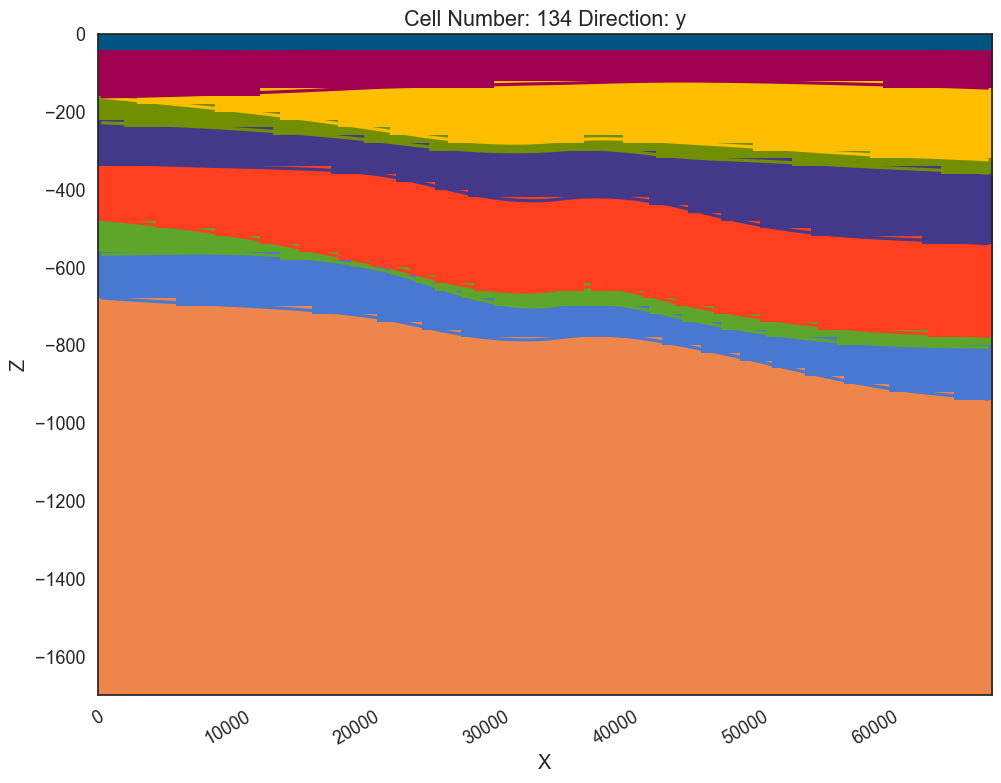

In [24]:
# Model cross section along strike direction
gp.plot_2d(geo_model, direction="y", cell_number=134, ve=30, show_data=False, show_lith=True)

In [25]:
# Model in full 3D view
gpv = gp.plot_3d(geo_model, ve=30, plotter_type='background', show_data=False)
gpv.p.camera_position = (320, 200,3)

In [28]:
# Save in pkl
import pickle
path='Data/Geo-structural model/Geo-structural_model_NJ_shelf.pkl'
with open(path, "wb") as f:
    pickle.dump(geo_model, f)

In [30]:
# Save result to zipped folder (contains all relevant files to directly recompute model)
gp.save_model(geo_model)

True